<a href="https://colab.research.google.com/github/Gurushankar2025/neural-word-embeddings/blob/main/projects/resume_screening/Resume_Screening__Spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Resume screening using spacy**

In [ ]:
# Download Spacy large model which has word vectors
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install imbalanced-learn                           #To balance an imbalanced dataset

In [ ]:
#import library
import spacy
import pandas as pd
from google.colab import files        #used for uploading the data from local drive

In [ ]:
nlp=spacy.load("en_core_web_lg")            #large_model

### **Data Preprocessing**

In [ ]:
Resume_data=files.upload_file('AI_Resume_Screening.csv')

Saved AI_Resume_Screening.csv to /content/AI_Resume_Screening.csv


In [ ]:
df=pd.read_csv('AI_Resume_Screening.csv')

In [ ]:
df.head(10)

,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100
5,6,Samantha Santos,"Cybersecurity, Networking, Linux, Ethical Hacking",10,B.Tech,Google ML,Cybersecurity Analyst,Hire,47957,5,100
6,7,Tony Smith,"Networking, Cybersecurity, Ethical Hacking",4,M.Tech,AWS Certified,Cybersecurity Analyst,Hire,66208,9,100
7,8,Anthony Harrison,"TensorFlow, Pytorch, NLP",3,M.Tech,AWS Certified,AI Researcher,Hire,103006,7,90
8,9,Nancy Jenkins,"Networking, Ethical Hacking",7,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,92270,3,100
9,10,Courtney Gibson,"Python, TensorFlow, Pytorch, NLP",0,M.Tech,AWS Certified,AI Researcher,Reject,60579,1,35


In [ ]:
df['Job_result']=df['Recruiter Decision'].map({'Hire':1,'Reject':0})            #create a label in numeric using map function

In [ ]:
 #merge the columns to get a single input text column

column_to_merge=['Skills', 'Experience (Years)', 'Education','Certifications', 'Job Role','Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']
df['reusme_text']=df[column_to_merge].astype(str).agg(','.join,axis=1)

In [ ]:
df['reusme_text'].head(10)

,reusme_text
0,"TensorFlow, NLP, Pytorch,10,B.Sc,nan,AI Resear..."
1,"Deep Learning, Machine Learning, Python, SQL,1..."
2,"Ethical Hacking, Cybersecurity, Linux,1,MBA,De..."
3,"Python, Pytorch, TensorFlow,7,B.Tech,AWS Certi..."
4,"SQL, React, Java,4,PhD,nan,Software Engineer,8..."
5,"Cybersecurity, Networking, Linux, Ethical Hack..."
6,"Networking, Cybersecurity, Ethical Hacking,4,M..."
7,"TensorFlow, Pytorch, NLP,3,M.Tech,AWS Certifie..."
8,"Networking, Ethical Hacking,7,MBA,Deep Learnin..."
9,"Python, TensorFlow, Pytorch, NLP,0,M.Tech,AWS ..."


### **Word embedding**

In [ ]:
#Vectorization using wordvectors from spacy

df['data_Vector']=df['reusme_text'].apply(lambda text:nlp(text).vector)   #This will create vector object for each text with size 300

In [ ]:
df.Job_result.value_counts()                           # As we can see there is an imbalance in the data, To solve this we use Smote(Synthetic minimal Over-sampling)

,count
Job_result,
1,812
0,188


In [ ]:
import numpy as np

X_vectors = np.vstack(df['data_Vector'].values)    # Stack all vectors into a single 2D numpy array


In [ ]:
X_vectors.shape

(1000, 300)

In [ ]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy=0.95,random_state=12)
X_resample,Y_resample = smote.fit_resample(X_vectors,df.Job_result)

In [ ]:
X_resample.shape

(1583, 300)

In [ ]:
pd.Series(Y_resample).value_counts()      # Now It is balanced

,count
Job_result,
1,812
0,771


In [ ]:
from sklearn.preprocessing import MinMaxScaler          #Scale the values for classifiers

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resample)

In [ ]:
X_scaled.shape

(1583, 300)

### **Train-Test Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(
    X_scaled,
    Y_resample,
    test_size=0.2,
    random_state=12
    )
xtrain.shape

(1266, 300)

### **Model Training and Testing**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #KNN

In [ ]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

### **Result and Report**

In [ ]:
y_predict=model.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       162
           1       0.70      0.74      0.72       155

    accuracy                           0.72       317
   macro avg       0.72      0.72      0.72       317
weighted avg       0.72      0.72      0.72       317



### **Confusion Matrix**

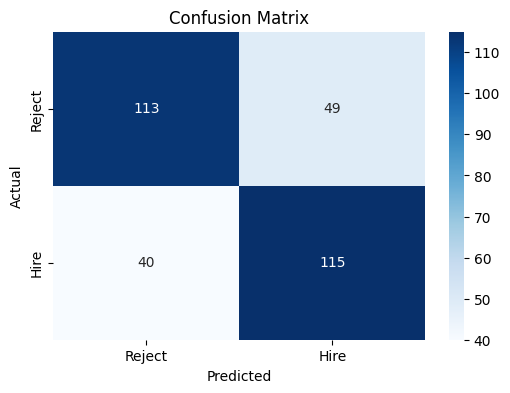

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(ytest, y_predict)

# Plot with seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Reject', 'Hire'],
            yticklabels=['Reject', 'Hire'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()